In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

## Simple model (one layer)

In [2]:
EPOCHS = 10 #200 # save time since playing around
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize data to 1
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# One-hot-encode labels
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

11490434/11490434 [==============================] - 2s 0us/step
60000 train samples
10000 test samples


In [9]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES, input_shape=(RESHAPED,), name='dense_layer', activation='softmax'))

In [10]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1.3684 - accuracy: 0.6711 - val_loss: 0.8853 - val_accuracy: 0.8244
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.7915 - accuracy: 0.8256 - val_loss: 0.6539 - val_accuracy: 0.8581
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.6435 - accuracy: 0.8483 - val_loss: 0.5601 - val_accuracy: 0.8698
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5714 - accuracy: 0.8598 - val_loss: 0.5076 - val_accuracy: 0.8784
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5275 - accuracy: 0.8671 - val_loss: 0.4742 - val_accuracy: 0.8832
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4972 - accuracy: 0.8725 - val_loss: 0.4502 - val_accuracy: 0.8867
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4748 - accuracy: 0.8766 - val_loss: 0.4321 - val_accuracy: 0.8901
Epoch 

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_accuracy)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.8935
Test accuracy: 0.8934999704360962
Test loss: 0.4001735746860504


## Slightly more complex model with multiple hidden layers

In [14]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='dense_layer', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='dense_layer2', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES, input_shape=(RESHAPED,), name='softmax_layer', activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dense_layer2 (Dense)        (None, 128)               16512     
                                                                 
 softmax_layer (Dense)       (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_accuracy)
print('Test loss:', test_loss)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 1.3971 - accuracy: 0.6330 - val_loss: 0.7108 - val_accuracy: 0.8362
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5829 - accuracy: 0.8520 - val_loss: 0.4501 - val_accuracy: 0.8840
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.8816 - val_loss: 0.3719 - val_accuracy: 0.9005
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3775 - accuracy: 0.8947 - val_loss: 0.3365 - val_accuracy: 0.9078
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3440 - accuracy: 0.9037 - val_loss: 0.3122 - val_accuracy: 0.9141
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3208 - accuracy: 0.9091 - val_loss: 0.2936 - val_accuracy: 0.9175
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3030 - accuracy: 0.9144 - val_loss: 0.2797 - val_accuracy: 0.9202
Epoch 

## Add (dropout) regularization to help the model generalize better

In [16]:
DROPOUT = 0.2

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN, name='dense_layer2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES, name='softmax_layer', activation='softmax'))

model.summary()

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_accuracy)
print('Test loss:', test_loss)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer2 (Dense)        (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 softmax_layer (Dense)       (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
375

## Compare different optimizers

In [17]:
model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_accuracy)
print('Test loss:', test_loss)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2562 - accuracy: 0.9226 - val_loss: 0.1403 - val_accuracy: 0.9578
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1640 - accuracy: 0.9508 - val_loss: 0.1135 - val_accuracy: 0.9663
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1273 - accuracy: 0.9611 - val_loss: 0.0969 - val_accuracy: 0.9707
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1089 - accuracy: 0.9665 - val_loss: 0.0943 - val_accuracy: 0.9722
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0947 - accuracy: 0.9709 - val_loss: 0.0943 - val_accuracy: 0.9728
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0855 - accuracy: 0.9737 - val_loss: 0.0826 - val_accuracy: 0.9749
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0774 - accuracy: 0.9760 - val_loss: 0.0944 - val_accuracy: 0.9737
Epoch 

In [18]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_accuracy)
print('Test loss:', test_loss)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.0613 - accuracy: 0.9810 - val_loss: 0.0820 - val_accuracy: 0.9778
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0564 - accuracy: 0.9816 - val_loss: 0.0876 - val_accuracy: 0.9778
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0507 - accuracy: 0.9834 - val_loss: 0.0816 - val_accuracy: 0.9783
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0454 - accuracy: 0.9850 - val_loss: 0.0861 - val_accuracy: 0.9772
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0448 - accuracy: 0.9854 - val_loss: 0.0830 - val_accuracy: 0.9783
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9864 - val_loss: 0.0807 - val_accuracy: 0.9792
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.0811 - val_accuracy: 0.9790
Epoch 

In [24]:
## Explore the model

In [26]:
output = model.predict(X_test[:1])
print(output)

1/1 [==============================] - 0s 30ms/step
[[4.5838406e-11 3.7326120e-07 3.2850041e-06 2.4980498e-05 3.5918917e-11
  5.3319554e-10 1.0381177e-14 9.9997127e-01 1.3140560e-08 1.3108875e-07]]


In [27]:
np.argmax(output)

7

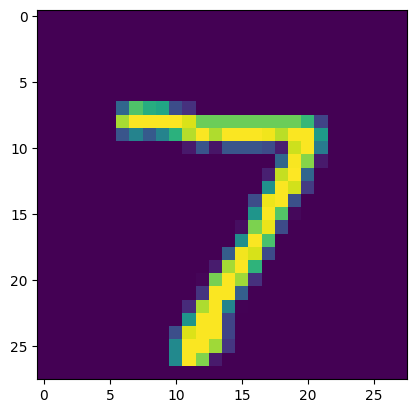

In [25]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0].reshape(28, 28))
plt.show()